# **Loan Prediction Problem**

Binary classification with imbalanced classes problem. You can find the [dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?datasetId=137197&sortBy=voteCount) here.

## **Preprocessing and Data Analysis**

First, upload your Kaggle credentials JSON file. Then setup the Colab Notebook


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [ ]:
! kaggle datasets download altruistdelhite04/loan-prediction-problem-dataset
! unzip loan-prediction-problem-dataset.zip

Import libraries

In [ ]:
!pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option("display.precision", 3)
%matplotlib inline

Import dataset

In [158]:
train_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
train_df.shape

(614, 13)

Inspect data

In [219]:
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
6,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,2.0,1.0
7,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,1.0,0.0
8,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,2.0,1.0
9,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,1.0,0.0
10,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.0,360.0,1.0,2.0,1.0


In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [161]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
train_df['Credit_History'] = train_df['Credit_History'].astype('O')
train_df.drop('Loan_ID', axis=1, inplace=True)

In [163]:
train_df.describe(include='O').transpose()

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Credit_History,564.0,2.0,1.0,475.0
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [164]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459,6109.042,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.246,2926.248,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412,85.587,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000,65.120,12.0,360.0,360.0,360.00,480.0


In [165]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

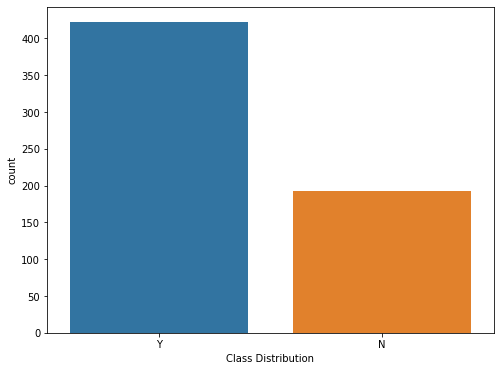

In [166]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Loan_Status'])
plt.xlabel("Class Distribution")
plt.show()

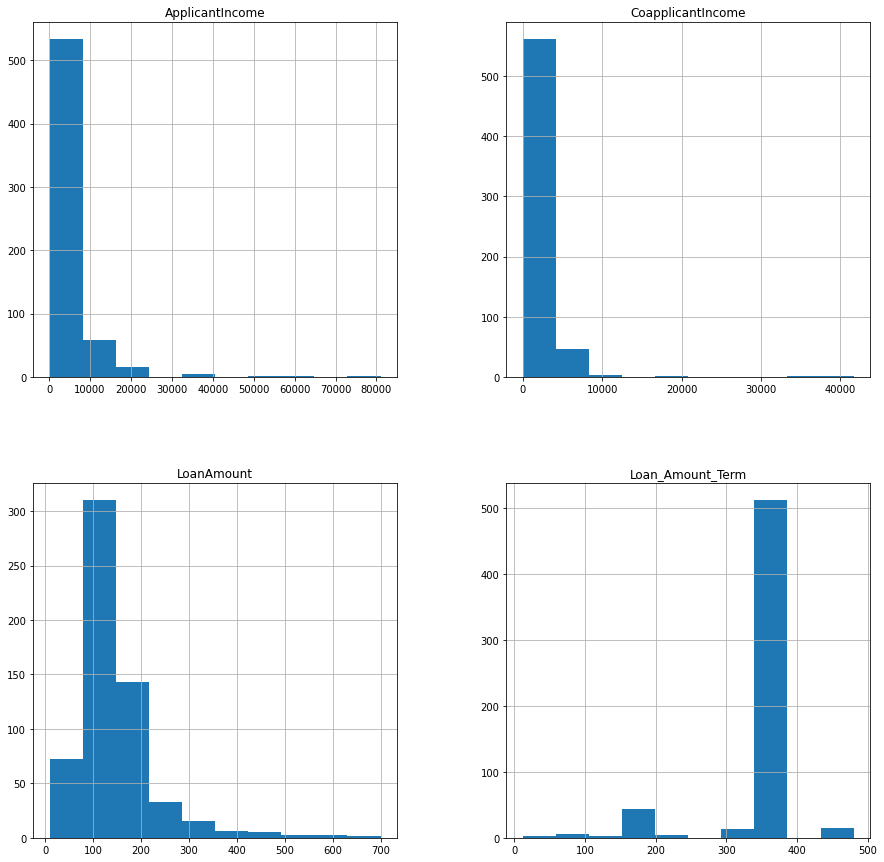

In [167]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train_df.hist(ax = ax)
plt.show()

In [168]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

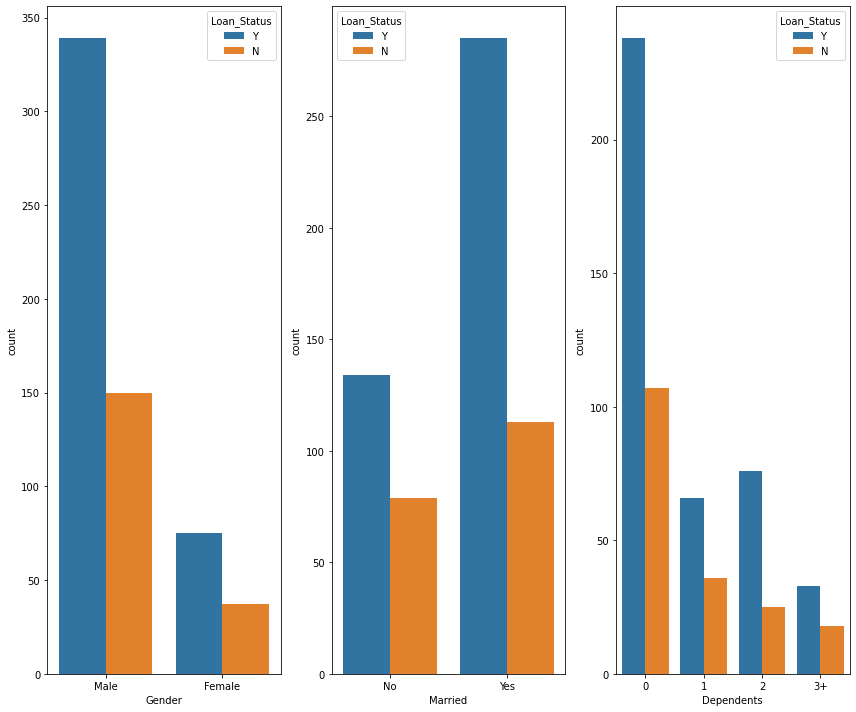

In [169]:
plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
sns.countplot(x='Gender', hue='Loan_Status', data=train_df)

plt.subplot(1,3,2)
sns.countplot(x='Married', hue='Loan_Status', data=train_df)

plt.subplot(1,3,3)
sns.countplot(x='Dependents', hue='Loan_Status', data=train_df)

plt.tight_layout()
plt.show()

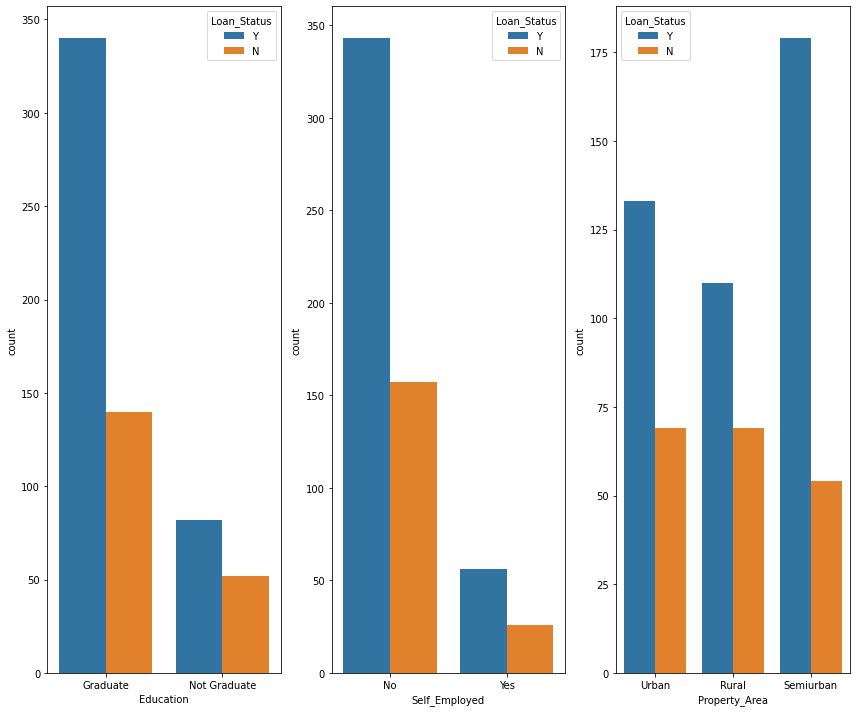

In [170]:
plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
sns.countplot(x='Education', hue='Loan_Status', data=train_df)

plt.subplot(1,3,2)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df)

plt.subplot(1,3,3)
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df)

plt.tight_layout()
plt.show()

Drop columns with missing values

In [171]:
train_df.dropna(how='any',inplace = True)
train_df.shape

(480, 12)

Encode categorical data to numeric


In [172]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

for col in list(train_df.select_dtypes(include="O").columns):
  train_df[col] = ord_enc.fit_transform(train_df[[col]])

In [173]:
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.35,0.22,0.06,-0.00,0.03,0.16,0.10,-0.09,0.02,-0.00,0.06
Married,0.35,1.00,0.39,0.00,0.02,0.04,0.10,0.18,-0.11,0.03,0.04,0.11
Dependents,0.22,0.39,1.00,0.03,0.05,0.13,-0.00,0.17,-0.10,-0.03,0.00,0.04
Education,0.06,0.00,0.03,1.00,-0.01,-0.13,-0.07,-0.17,-0.10,-0.06,-0.06,-0.07
Self_Employed,-0.00,0.02,0.05,-0.01,1.00,0.17,-0.00,0.12,-0.03,-0.02,-0.05,-0.03
ApplicantIncome,0.03,0.04,0.13,-0.13,0.17,1.00,-0.11,0.50,-0.01,-0.06,-0.05,-0.04
CoapplicantIncome,0.16,0.10,-0.00,-0.07,-0.00,-0.11,1.00,0.19,-0.01,-0.01,0.01,-0.05
LoanAmount,0.10,0.18,0.17,-0.17,0.12,0.50,0.19,1.00,0.05,-0.04,-0.11,-0.07
Loan_Amount_Term,-0.09,-0.11,-0.10,-0.10,-0.03,-0.01,-0.01,0.05,1.00,0.03,-0.06,-0.01
Credit_History,0.02,0.03,-0.03,-0.06,-0.02,-0.06,-0.01,-0.04,0.03,1.00,-0.00,0.53


## **Train model**

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [175]:
y = train_df['Loan_Status']
X = train_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [177]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

         0.0       0.88      0.43      0.58        35
         1.0       0.75      0.97      0.84        61

    accuracy                           0.77        96
   macro avg       0.81      0.70      0.71        96
weighted avg       0.80      0.77      0.75        96

77.08% Accurate


## **Dealing with Imbalanced Classes**

In [215]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


rus = RandomUnderSampler(random_state=42, replacement=True)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)
X_ros, y_ros = ros.fit_resample(X, y)
X_smote, y_smote = smote.fit_resample(X, y)

print('Original class distribution:', Counter(y))
print('Undersampling class distribution', Counter(y_rus))
print('Oversampling class distribution', Counter(y_ros))
print('SMOTE class distribution', Counter(y_smote))

Original class distribution: Counter({1.0: 332, 0.0: 148})
Undersampling class distribution Counter({0.0: 148, 1.0: 148})
Oversampling class distribution Counter({1.0: 332, 0.0: 332})
SMOTE class distribution Counter({1.0: 332, 0.0: 332})


In [216]:
#Random Under-Sampling

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 0)
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

accuracy = accuracy_score(y_predict,y_test)
print("Undersampling Accuracy Score: {0:.2%}".format(accuracy))

Undersampling Accuracy Score: 74.16%


In [217]:
#Random Over-Sampling

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

accuracy = accuracy_score(y_predict,y_test)
print("Oversampling Accuracy Score: {0:.2%}".format(accuracy))

Oversampling Accuracy Score: 93.00%


In [218]:
#SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 0)
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

accuracy = accuracy_score(y_predict,y_test)
print("SMOTE Accuracy Score: {0:.2%}".format(accuracy))

SMOTE Accuracy Score: 87.00%
